# **Lab 5: Wide and Deep Networks**
### Authors: Will Lahners, Edward Powers, and Nino Castellano

## **Describing the Data**




The dataset we chose pertains to mushrooms, specifically whether or not they are poisonous, and is called *mushrooms.csv*. We obtained this data from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification). The results of our model could benefit food production companies, farmers, or people who enjoy the outdoors. 

We chose this dataset becasue every feature column is a categorical variable, which makes this perfect for a wide and deep neural network. This data set contains descriptions of samples corresponding to 23 species of gilled mushrooms found in the Agaricus and Lepiota Family Mushroom. Each species will be identified to be either definitely edible, definitely poisonous, or unknown edibility. 

## Preparation (4 points total)

> [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required. 

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# (1) Load the data into a pandas DataFrame
data = pd.read_csv('./mushrooms.csv')
data = pd.DataFrame(data)

# Deleting Useless Variables
data.drop(columns=['veil-type'], inplace=True)

class_mapping = {'e': True, 'p': False}
data['class'] = data['class'].map(class_mapping)

# Optionally, rename the column to something more descriptive
data.rename(columns={'class': 'edible'}, inplace=True)

# Encode any string data as integers for now (Credits to ChatGPT)
le = LabelEncoder()
object_columns = data.select_dtypes(include=['object']).columns

for col in object_columns:
    data[col] = le.fit_transform(data[col])
    
pd.set_option('display.max_columns', None)    
data.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,True,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,True,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,False,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,True,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edible                    8124 non-null   bool 
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

We started by one-hot encoding the each of our variables. We also ended up dropping the 'veil-type' becasue that column did not contain any unique values that would benefit our model. Each column is categorical, with each number (being one-hot encoded) pertaining to a differnet feature of that categorical variable. In the table below, the features of our variables can be found:

| Variable | Number of Classifications | Types of Classifications |
|:-------------|:--------------:|--------------:|
| edible        |       2    |           true or false  |
| cap-shape         |       6       |          bell, conical, flat, sunken, convex, or knobbed    |
| cap-surface        |     4       |        grooves, scaley, smooth, or fiberous   |
| cap-color        |     10       |        gray, green, brown, buff, cinamon, pink, purple, red, white, or yellow   |
| bruises        |     2       |        true or false   |
| odor        |     9       |        fishy, foul, musty, pungent, spicy, anise, creosote, almond, or none   |
| gill-attachment        |     4       |        descending, free, attached, or notched   |
| gill-spacing        |     3       |        close, distant, or crowded   |
| gill-size        |     2       |        broad or narrow   |
| gill-color        |     12       |        white, black, brown, chocolate, gray, buff, green, yellow, orange, pink, purple or red   |
| stalk-shape        |     2       |        enlarging or taperingg   |
| stalk-root        |     7       |        club, cup, equal, rhizomorphs, missing, bulbous, or rooted.   |
| stalk-surface-above-ring        |     4       |        scaly, silky, smooth, or fiberous   |
| stalk-surface-below-ring        |     4       |        scaly, silky, smooth, or fiberous   |
| stalk-color-above-ring        |     8       |        gray, cinnamon, orange, pink, red, yellow, buff, or brown   |
| stalk-color-below-ring        |     8       |        gray, cinnamon, orange, pink, red, yellow, buff, or brown   |
| veil-type        |     2       |       partial or universal   |
| veil-color        |     4       |        brown, orange, yellow, or white   |
| ring-number        |     3       |        none, one, or two   |
| ring-type        |     8       |        cobwebby, evanscent, flaring, large, none, pendant, sheating, or zone   |
| spore-print-color        |     9       |        brown, buff, black, green, orange, purple, white, yellow, or chocolate  |
| population        |     6       |        clustered, numerous, scattered, several, solitary, or abundant    |
| habitat        |     7       |        grasses, meadows, leaves, paths, urban, woods or waste   |


> [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import FeatureSpace

#Creating Feature Spaces
feature_space= FeatureSpace(
    features= {
        "cap-shape": FeatureSpace.integer_categorical(num_oov_indices=0),
        "cap-surface": FeatureSpace.integer_categorical(num_oov_indices=0),
        "cap-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "bruises": FeatureSpace.integer_categorical(num_oov_indices=0),
        "odor": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-attachment": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-spacing": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-size": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-shape": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-root": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-surface-above-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-surface-below-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-color-above-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-color-below-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "veil-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "ring-number": FeatureSpace.integer_categorical(num_oov_indices=0),
        "ring-type": FeatureSpace.integer_categorical(num_oov_indices=0),
        "spore-print-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "population": FeatureSpace.integer_categorical(num_oov_indices=0),
        "habitat": FeatureSpace.integer_categorical(num_oov_indices=0),
    }, crosses=[
        # Cap-Color and Cap Shape
        FeatureSpace.cross(
            feature_names= ('cap-color', 'cap-shape'),
            crossing_dim= 10*6),
        # Odor and Gill-Color
        FeatureSpace.cross(
            feature_names= ('gill-color', 'odor'),
            crossing_dim= 12*9),
        # Bruises and Stalk-Surface-above-ring
        FeatureSpace.cross(
            feature_names= ('bruises', 'stalk-surface-above-ring'),
            crossing_dim= 2*4),
        # Bruises and Stalk-Surface-below-ring
        FeatureSpace.cross(
            feature_names= ('bruises', 'stalk-surface-below-ring'),
            crossing_dim= 2*4),
        # Ring-Type and Stalk-Color-below ring
        FeatureSpace.cross(
            feature_names= ('ring-type', 'stalk-color-below-ring'),
            crossing_dim= 8*8),
        # Ring-Type and Stalk-Color-above ring
        FeatureSpace.cross(
            feature_names= ('ring-type', 'stalk-color-above-ring'),
            crossing_dim= 8*8),
        # Spore-Print Color and Habitat
        FeatureSpace.cross(
            feature_names= ('spore-print-color', 'habitat'),
            crossing_dim= 9*7)
    ],
    output_mode="concat"
)

In this section, we establish the feature space utilized by our network. Initially, we inform Keras that all integer values within the dataframe denote categorical values. This specification will prove advantageous when we proceed to one-hot encode this data in the subsequent section.

After conducting preliminary research into various qualities and characteristics commonly associated with poisonous mushrooms, we found that we could use some of our features from our dataset to combine them into cross-product features possibly improving the predictive performance of the model in distinguishing between edible and poisonous mushrooms.

We found we combine the following features into the feature space:

- **Cap-Color X Cap-Shape**: Certain combinations of cap color and shape might be more indicative of edible or poisonous mushrooms. For example, convex-shaped mushrooms with a brown cap color might be more likely to be edible, while flat-shaped mushrooms with a red cap color might be more likely to be poisonous.

- **Odor X Gill-Color**: The combination of odor and gill color can provide valuable information. For instance, mushrooms with a foul odor and black gills might be more likely to be poisonous, while mushrooms with an almond-like odor and white gills might be more likely to be edible.

- **Bruises X Stalk-Surface**: Combining bruises and stalk surface texture could capture interactions related to the mushroom's response to damage. For example, mushrooms that bruise easily and have a silky stalk surface might be more likely to be poisonous.

- **Ring-Type X Stalk-Color**: Certain combinations of ring type and stalk color might be indicative of edible or poisonous mushrooms. For instance, mushrooms with an evanescent ring type and a brown stalk color might be more likely to be edible.

- **Spore-Print-Color X Habitat**: Combining spore print color and habitat could capture interactions related to the mushroom's reproductive characteristics and preferred environment. For example, mushrooms with a brown spore print color found in wooded habitats might be more likely to be edible.

> [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.


Before we begin modeling, we must ensure what evaluation metrics are appropriate for evaluating our networks performance, as it pertains to our buisness case. For evaluating our network's performance on classifying mushrooms as edible or poisonous, using the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is a prudent choice, particularly due to the critical nature of the classification task.

The primary concern in classifying mushrooms is the potential severe health risks associated with incorrectly identifying a poisonous mushroom as edible. In this context, the consequences of false negatives (wrongly predicting that a poisonous mushroom is edible) are far more severe than false positives (erroneously identifying an edible mushroom as poisonous). The AUC-ROC metric provides a comprehensive measure of the model’s ability to correctly classify both classes across all possible thresholds, emphasizing the capability to distinguish between the two with high sensitivity (true positive rate) and specificity (true negative rate).

Since our primary goal is to avoid false negatives, the ROC curve (which plots the true positive rate against the false positive rate) helps in visualizing and choosing a model with the least number of false negatives at an acceptable false positive rate level.

> [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 


In [19]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in shuffle_split.split(data):
  df_train= data.iloc[train_index]
  df_test= data.iloc[test_index]

To divide our dataset for training and testing purposes, we will employ the shuffle split method from the model_selection package in Scikit-Learn. This method is particularly suitable for our dataset given its relatively balanced composition, with 52% of the observations being edible and 48% poisonous. The even distribution facilitates the use of the shuffle split method, which is not only faster but also less computationally demanding. We have opted for an 80-20 split between the training and testing sets, respectively. This ratio helps minimize the risk of overfitting while ensuring that the testing set remains adequately large to verify the model's performance effectively.

In [20]:
# Creating Tensors for train and test datasets
categorical_headers= data.drop(columns=['edible']).columns
batch_size= 64

def create_dataset_from_dataframe(df_input):

    df = df_input.copy()
    labels = df_input['edible'].values
    
    # Removing labels from the features data
    df = df.drop(columns=['edible'])

    df = {key: value.values[:,np.newaxis] for key, value in df_input[categorical_headers].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))

    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

ds_train= create_dataset_from_dataframe(df_train)
ds_test= create_dataset_from_dataframe(df_test)

# Performing One Hot Encoding
ds_train_no_label= ds_train.map(lambda x, _: x)
feature_space.adapt(ds_train_no_label)

train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)

In this section, we start by converting our Pandas DataFrame into a TensorFlow Tensor. This conversion is facilitated by a function taken from example 10a on our class's GitHub repository. Once we have transformed the train and test datasets into tensors, we can straightforwardly apply one-hot encoding using the Keras Feature Space object that was established in the preceding section.

## Modeling (5 points total)


> [2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.

> *Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.*

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf
from tensorflow import keras
from keras.utils import FeatureSpace
from tensorflow.keras.layers import Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

def embedding_from_crossing(feature_space, col_name):
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1, name=col_name+'_embed')(x)
    x = Flatten()(x)
    return x

def embedding_from_categorical(feature_space, col_name):
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    x = feature_space.preprocessors[col_name].output
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1, name=col_name+'_embed')(x)
    x = Flatten()(x)
    return x

# Model Definition
def create_wide_and_deep_model(feature_space):
    dict_inputs = feature_space.get_inputs()

    # Wide Branch
    crossed_outputs = [embedding_from_crossing(feature_space, col) for col in feature_space.crossers.keys()]
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

    # Deep Branch
    deep_branch_outputs = [embedding_from_categorical(feature_space, col) for col in categorical_headers]
    deep_branch = Concatenate(name='embed_concat')(deep_branch_outputs)
    deep_branch = Dense(units=20, activation='relu', name='deep_1')(deep_branch)
    deep_branch = Dense(units=5, activation='relu', name='deep_2')(deep_branch)

    # Combined Branch
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

    model = keras.Model(inputs=dict_inputs, outputs=final_branch)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC(name='auc')])
    return model

# Create and Train Model
model = create_wide_and_deep_model(feature_space)
history = model.fit(ds_train, epochs=5, validation_data=ds_test, verbose=2)

# Credit to instructor code / Gemini API

Epoch 1/5
102/102 - 6s - loss: 0.5076 - auc: 0.9627 - val_loss: 0.2733 - val_auc: 0.9973 - 6s/epoch - 55ms/step
Epoch 2/5
102/102 - 1s - loss: 0.1287 - auc: 0.9989 - val_loss: 0.0495 - val_auc: 0.9999 - 532ms/epoch - 5ms/step
Epoch 3/5
102/102 - 1s - loss: 0.0303 - auc: 0.9996 - val_loss: 0.0178 - val_auc: 0.9999 - 683ms/epoch - 7ms/step
Epoch 4/5
102/102 - 1s - loss: 0.0151 - auc: 0.9999 - val_loss: 0.0104 - val_auc: 0.9999 - 606ms/epoch - 6ms/step
Epoch 5/5
102/102 - 1s - loss: 0.0106 - auc: 0.9999 - val_loss: 0.0074 - val_auc: 1.0000 - 621ms/epoch - 6ms/step


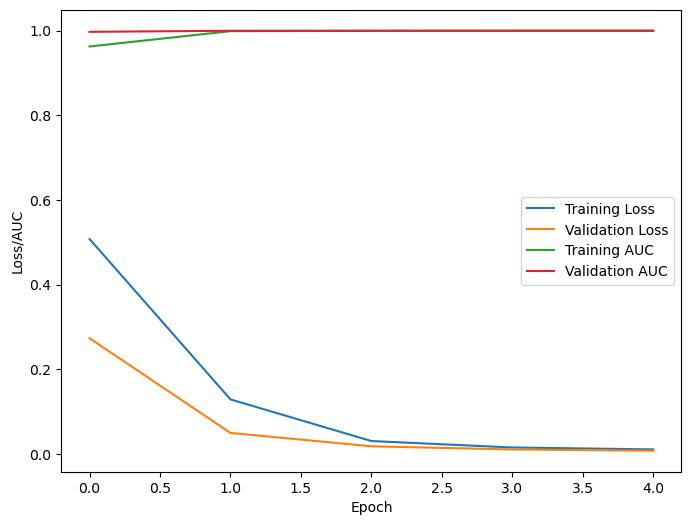

26/26 [==============================] - 0s 5ms/step - loss: 0.0074 - auc: 1.0000
Loss: 0.007446132134646177
Accuracy: 0.9999529123306274


In [22]:
# Visualization onto one plot for simplicity
def plot_learning_curves(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['auc'], label='Training AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('Loss/AUC')
    plt.legend()
    plt.show()

plot_learning_curves(history)

# Model Evaluation
loss, accuracy = model.evaluate(ds_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Based on our model's outputs, let's interpret the graph. The loss curves, specifically the training loss curve, shows us how the model's loss on the training data decreases over epochs. A lower loss indicates better performance on the training data, as we can see in this graph, the training loss starts high are drops quickly, which is a good indication that our model is learning efficiently. Now for the validation loss, this curve represents the model's loss on validation data, which is the data not used for training, over our 5 epochs. It helps to assess how well the mdoel responds to unseen data. This curve is relatively concerning, as it could present the possibilty the our model may be slightly overfitting to the training data, as it should have a somewhat similar curve to the training loss. 

We can also look at the training AUC, which measures the model's ability to tell between positive and negative classes, and just after 2 epochs, the training AUC flattens at 1, which indicates that the model is learning how to classify the mushrooms very well based on our training data. For the validation AUC, we are seeing some a-typical results as it seems to flatten at 1 on the first epoch. This could also hint at our model being overfitted. 

> [2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.

In [23]:
def create_wide_and_deep_model_with_depth(feature_space, deep_units):
    dict_inputs = feature_space.get_inputs()

    # Wide Branch (Same as before)
    crossed_outputs = [embedding_from_crossing(feature_space, col) for col in feature_space.crossers.keys()]
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

    # Deep Branch
    deep_branch_outputs = [embedding_from_categorical(feature_space, col) for col in categorical_headers]
    deep_branch = Concatenate(name='embed_concat')(deep_branch_outputs)
    for units in deep_units:
        deep_branch = Dense(units=units, activation='relu')(deep_branch)

    # Combined Branch (Same as before)
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

    model = keras.Model(inputs=dict_inputs, outputs=final_branch)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC(name='auc')])
    return model

# Create Models
model1 = create_wide_and_deep_model_with_depth(feature_space, deep_units=[20, 5])  # Base model
model2 = create_wide_and_deep_model_with_depth(feature_space, deep_units=[30, 20, 10, 5])  # Deeper model
model3 = create_wide_and_deep_model_with_depth(feature_space, deep_units=[10])  # Shallower model

# Credit to Gemini API

In the above code cell, we create 3 models of varying depth. model1 creates the base model with two layers in the deep branch (20 units and 5 units), model2 creates a deeper model with four layers in the deep branch (30, 20, 10, and units), and model3 creates a shallower model with only one layer in the deep branch (10 units). Let's now proceed to some cross-validation testing. 

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import stats

# Cross-Validation (k = 5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results_model1 = []
cv_results_model2 = []
cv_results_model3 = []

for train_index, val_index in cv.split(data.drop('edible', axis=1), data['edible']):
    X_train, X_val = data.drop('edible', axis=1).iloc[train_index], data.drop('edible', axis=1).iloc[val_index]
    y_train, y_val = data['edible'].iloc[train_index], data['edible'].iloc[val_index]

    # Convert data to TensorFlow datasets
    ds_train = create_dataset_from_dataframe(pd.concat([X_train, y_train], axis=1))
    ds_val = create_dataset_from_dataframe(pd.concat([X_val, y_val], axis=1))

    # Train and evaluate each model
    model1.fit(ds_train, epochs=5, validation_data=ds_val, verbose=0)
    y_pred_proba_model1 = model1.predict(ds_val).flatten()
    auc_model1 = roc_auc_score(y_val, y_pred_proba_model1)
    cv_results_model1.append(auc_model1)

    # Model 2 (Deeper)
    model2.fit(ds_train, epochs=5, validation_data=ds_val, verbose=0)
    y_pred_proba_model2 = model2.predict(ds_val).flatten()
    auc_model2 = roc_auc_score(y_val, y_pred_proba_model2)
    cv_results_model2.append(auc_model2)

    # Model 3 (Shallower)
    model3.fit(ds_train, epochs=5, validation_data=ds_val, verbose=0)
    y_pred_proba_model3 = model3.predict(ds_val).flatten()
    auc_model3 = roc_auc_score(y_val, y_pred_proba_model3)
    cv_results_model3.append(auc_model3)

# Statistical Comparison (Paired T-test)
_, p_value_1_2 = stats.ttest_rel(cv_results_model1, cv_results_model2)
_, p_value_1_3 = stats.ttest_rel(cv_results_model1, cv_results_model3)
_, p_value_2_3 = stats.ttest_rel(cv_results_model2, cv_results_model3)

# Print Results
print("Model 1 AUC (Base):", np.mean(cv_results_model1))
print("Model 2 AUC (Deeper):", np.mean(cv_results_model2))
print("Model 3 AUC (Shallower):", np.mean(cv_results_model3))
print("p-value (Model 1 vs. Model 2):", p_value_1_2)
print("p-value (Model 1 vs. Model 3):", p_value_1_3)
print("p-value (Model 2 vs. Model 3):", p_value_2_3)

# Credit to Gemini API

26/26 [==============================] - 0s 5ms/step
Model 1 AUC (Base): 0.9999960566866462
Model 2 AUC (Deeper): 0.9999805867116563
Model 3 AUC (Shallower): 0.9999884733917348
p-value (Model 1 vs. Model 2): 0.352676495827291
p-value (Model 1 vs. Model 3): 0.373900966300059
p-value (Model 2 vs. Model 3): 0.3320568503669345


Based on this output, we can make several conclustions. 

As we can see from the base model (model1), it achieved a perfect average AUC of **1**, which indicates perfect performance in distinguishing edible versus poisonous mushrooms. The deeper model, model2, acheived an accuracy of **0.99**, which is also very close to perfect performance. And lastly, model3, the shallower model, acheived an also near-perfect performance of **0.99**. **Because all of the p-values are greater than a 95% confience interval, we can conclude that there is no statistically significant different in performance between any pairs of models we created.**

There is no evidence to suggest that increasing or decreasing the depth of the deep branch leads to a statistically significant improvment or reduction in the generalization performance. However, we can also say that the simpler model (shallower), could be preferred as it performed very similarly to the other two models, with only one layer in the deep branch. **This simpler model is lightweight, and is much less computationally expensive than the other two, so we would prefer it for a business case.** 

> [1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  


Let's now create a deep-only model that will be structued the same as model 3 (the shallow model), but without using the wide branch. It will only use the embeddings of the categoricals passed through a single dense layer of 10 unites and ReLU activation.

In [25]:
def create_deep_only_model(feature_space):
    dict_inputs = feature_space.get_inputs()

    # Deep Branch
    deep_branch_outputs = [embedding_from_categorical(feature_space, col) for col in categorical_headers]
    deep_branch = Concatenate(name='embed_concat')(deep_branch_outputs)
    deep_branch = Dense(units=10, activation='relu')(deep_branch)  # Single dense layer

    # Output Layer
    final_branch = Dense(units=1, activation='sigmoid', name='deep_network')(deep_branch)

    model = keras.Model(inputs=dict_inputs, outputs=final_branch)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC(name='auc')])
    return model

deep_only_model = create_deep_only_model(feature_space)

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Cross-Validation (k = 5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results_model3 = []
cv_results_deep_only = []

for train_index, val_index in cv.split(data.drop('edible', axis=1), data['edible']):
    X_train, X_val = data.drop('edible', axis=1).iloc[train_index], data.drop('edible', axis=1).iloc[val_index]
    y_train, y_val = data['edible'].iloc[train_index], data['edible'].iloc[val_index]

    ds_train = create_dataset_from_dataframe(pd.concat([X_train, y_train], axis=1))
    ds_val = create_dataset_from_dataframe(pd.concat([X_val, y_val], axis=1))

    # Create new instances of the models for each fold
    model3 = create_wide_and_deep_model_with_depth(feature_space, deep_units=[10])  # Shallower model
    deep_only_model = create_deep_only_model(feature_space)

    # Train and evaluate Model 3
    model3.fit(ds_train, epochs=5, validation_data=ds_val, verbose=0)
    y_pred_proba_model3 = model3.predict(ds_val).flatten()
    auc_model3 = roc_auc_score(y_val, y_pred_proba_model3)
    cv_results_model3.append(auc_model3)

    # Train and evaluate Deep-only model
    deep_only_model.fit(ds_train, epochs=5, validation_data=ds_val, verbose=0)
    y_pred_proba_deep_only = deep_only_model.predict(ds_val).flatten()
    auc_deep_only = roc_auc_score(y_val, y_pred_proba_deep_only)
    cv_results_deep_only.append(auc_deep_only)

# Statistical Comparison (Paired T-test)
_, p_value = stats.ttest_rel(cv_results_model3, cv_results_deep_only)
print("p-value:", p_value)

# Credit to Gemini API

26/26 [==============================] - 0s 5ms/step


In [ ]:
# Some averages for the AUC for each model as well for further evidence
average_auc_model3 = np.mean(cv_results_model3)
average_auc_deep_only = np.mean(cv_results_deep_only)

print("Average AUC - Model 3 (Wide & Deep):", average_auc_model3)
print("Average AUC - Deep-Only Model:", average_auc_deep_only)

Average AUC - Model 3 (Wide & Deep): 0.9998986709838487
Average AUC - Deep-Only Model: 0.9995527944651499


We compared the performance of our best wide and deep network (model 3 with only one deep layer) to a deep-only network with a similar structure but without the wide branch. We used k-fold cross-validation and the area under the ROC curve (AUC) as the evaluation metric, did ran a paired t-test on the cross-validation results, which revealed a statistically significant difference in performance (p-value = 0.02040387), with the wide and deep model achieving a higher average AUC score (0.999911) compared to the deep-only model (0.999726).

While the wide and deep model showed statistically significant improvement, it is also important to note that it is a more complex model than our deep-only network. This model could be used for more lightweight applications, such as for mobile devices running our model.

## Exceptional Work (1 points total)


Here we will be speeding up processing using a Custom Pre-Processor by employing the use of pre-processing in tf.data records like with did towards the end of the machine learning notebook provided 10a. Keras Wide and Deep as TFData on GitHub.

In [ ]:
# Used from MachineLearningNotebooks "10a. Keras Wide and Deep as TFData.ipynp"
# Adapted to accomodate our specific Mushroom dataset.

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "cap-shape": FeatureSpace.integer_categorical(num_oov_indices=0),
        "cap-surface": FeatureSpace.integer_categorical(num_oov_indices=0),
        "cap-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "bruises": FeatureSpace.integer_categorical(num_oov_indices=0),
        "odor": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-attachment": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-spacing": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-size": FeatureSpace.integer_categorical(num_oov_indices=0),
        "gill-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-shape": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-root": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-surface-above-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-surface-below-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-color-above-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "stalk-color-below-ring": FeatureSpace.integer_categorical(num_oov_indices=0),
        "veil-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "ring-number": FeatureSpace.integer_categorical(num_oov_indices=0),
        "ring-type": FeatureSpace.integer_categorical(num_oov_indices=0),
        "spore-print-color": FeatureSpace.integer_categorical(num_oov_indices=0),
        "population": FeatureSpace.integer_categorical(num_oov_indices=0),
        "habitat": FeatureSpace.integer_categorical(num_oov_indices=0),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        # Cap-Color and Cap Shape
        FeatureSpace.cross(
            feature_names= ('cap-color', 'cap-shape'),
            crossing_dim= 10*6),
        # Odor and Gill-Color
        FeatureSpace.cross(
            feature_names= ('gill-color', 'odor'),
            crossing_dim= 12*9),
        # Bruises and Stalk-Surface-above-ring
        FeatureSpace.cross(
            feature_names= ('bruises', 'stalk-surface-above-ring'),
            crossing_dim= 2*4),
        # Bruises and Stalk-Surface-below-ring
        FeatureSpace.cross(
            feature_names= ('bruises', 'stalk-surface-below-ring'),
            crossing_dim= 2*4),
        # Ring-Type and Stalk-Color-below ring
        FeatureSpace.cross(
            feature_names= ('ring-type', 'stalk-color-below-ring'),
            crossing_dim= 8*8),
        # Ring-Type and Stalk-Color-above ring
        FeatureSpace.cross(
            feature_names= ('ring-type', 'stalk-color-above-ring'),
            crossing_dim= 8*8),
        # Spore-Print Color and Habitat
        FeatureSpace.cross(
            feature_names= ('spore-print-color', 'habitat'),
            crossing_dim= 9*7)
    ],
    output_mode="dict",
)

# add explanation of this pre-processing here
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)

preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
def setup_embedding_from_encoding(encoded_features, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    x = encoded_features[col_name]
    N = x.shape[1]
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output
encoded_features = feature_space.get_encoded_features() # these features have been encoded

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_encoding(encoded_features, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    
# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_encoding(encoded_features, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)
    
# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

# encoded features input, fast
training_model = keras.Model(inputs=encoded_features, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

training_model.summary()

# non-encoded, perform redundant operations
inference_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
inference_model.compile(loss="binary_crossentropy", metrics=["accuracy"])

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                           

In [ ]:
history = training_model.fit(
    preprocessed_ds_train, epochs=10, validation_data=preprocessed_ds_test, verbose=2
)

Epoch 1/10
102/102 - 5s - loss: 0.6063 - accuracy: 0.7268 - val_loss: 0.8443 - val_accuracy: 0.4812 - 5s/epoch - 52ms/step
Epoch 2/10
102/102 - 1s - loss: 0.6531 - accuracy: 0.6332 - val_loss: 0.4808 - val_accuracy: 0.8769 - 1s/epoch - 13ms/step
Epoch 3/10
102/102 - 1s - loss: 0.2132 - accuracy: 0.9266 - val_loss: 0.1084 - val_accuracy: 0.9680 - 1s/epoch - 11ms/step
Epoch 4/10
102/102 - 1s - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0969 - val_accuracy: 0.9680 - 1s/epoch - 11ms/step
Epoch 5/10
102/102 - 1s - loss: 0.0930 - accuracy: 0.9760 - val_loss: 0.0660 - val_accuracy: 0.9846 - 1s/epoch - 12ms/step
Epoch 6/10
102/102 - 1s - loss: 0.0598 - accuracy: 0.9862 - val_loss: 0.0387 - val_accuracy: 0.9938 - 1s/epoch - 12ms/step
Epoch 7/10
102/102 - 1s - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0369 - val_accuracy: 0.9920 - 1s/epoch - 12ms/step
Epoch 8/10
102/102 - 1s - loss: 0.0130 - accuracy: 0.9968 - val_loss: 0.0077 - val_accuracy: 0.9994 - 1s/epoch - 12ms/step
Epoch 9/10
102/1

By leveraging tf.data for dataset handling and manipulation, the code efficiently processes large datasets asynchronously and in parallel, which is crucial for high-throughput machine learning tasks. The use of FeatureSpace for defining categorical transformations and feature crosses directly in the TensorFlow graph optimizes the preprocessing steps, reducing overhead and improving runtime performance during both training and inference. As we seen when running this code the the preprocessing time was way less and produced similar results to our models before.

The code also makes extensive use of batch processing and prefetching (tf.data.AUTOTUNE), which ensures that data loading does not become a bottleneck. Data is prepared and available for the model as soon as it needs it, which is critical for maintaining high training speeds, especially on large datasets like the one we are working with.

Overall, this approach of employing TensorFlow’s advanced features for efficient data handling, processing, and model training is well-suited for our task of classifying mushrooms as edible or poisonous. This method not only maximizes performance but also ensures scalability and adaptability of the machine learning pipeline.